### Section 10, class 93

##### Creating polynomial features

#### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data = df.copy()
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Separating the inputs and the output

In [5]:
X = df.drop('sales', axis=1)
y = df['sales']

#### Polynomial fit

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = polynomial_converter.transform(X)

In [10]:
poly_features.shape

(200, 9)

In [11]:
X.shape

(200, 3)

In [12]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [13]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

#### Performing a train-test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

#### Call the linear regression over the data

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
test_predictions = model.predict(X_test)

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

#### Checking the errors

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [23]:
MAE

0.48967980448035886

In [24]:
RMSE

0.6646431757269

In [25]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [26]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [27]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

### Error vs Polynomial order

In [28]:


train_rmse_error = []
test_rmse_error = []

for d in range(1, 10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [29]:
train_rmse_error

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020695,
 0.3517083688399345,
 0.25093429203443857,
 0.19404079884220665,
 5.4217056935652685,
 0.1431711767827839,
 0.17254817249854365]

In [30]:
test_rmse_error

[1.5161519375993877,
 0.6646431757269,
 0.5803286825216851,
 0.5077742636722449,
 2.575818175027777,
 4.305885040123266,
 1379.0991000113784,
 4212.9982767766915,
 95994.59945174544]

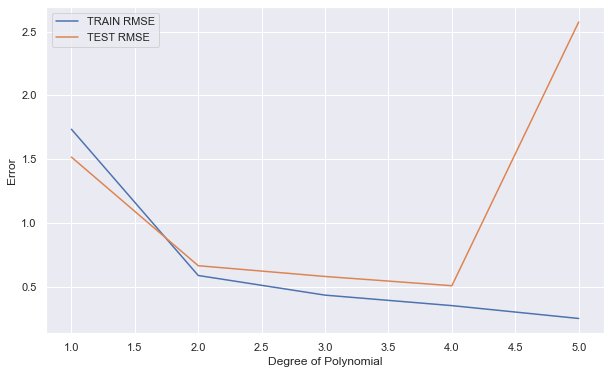

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), train_rmse_error[:5], label='TRAIN RMSE')
plt.plot(range(1, 6), test_rmse_error[:5], label='TEST RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.legend(loc='upper left')

In [32]:
#### Finalized Polynomial converter

In [33]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [34]:
final_model = LinearRegression()

In [35]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

#### Saving the final model and the final poly converter

In [36]:
from joblib import dump, load

In [37]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [41]:
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

#### Loading the final model and the final poly converter

In [43]:
loaded_converter = load('final_poly_converter.joblib')

In [44]:
loaded_model = load('final_poly_model.joblib')

#### Estimate new advertising campaign

In [45]:
campaign = [[149, 22, 12]]

In [51]:
loaded_converter.fit_transform(campaign).shape

In [52]:
transformed_data = loaded_converter.fit_transform(campaign)

In [53]:
loaded_model.predict(transformed_data)

array([14.64501014])